# Lecture 5: Pytorch and Supervised Learning

## Main Learning Outcomes
* Under pytorch/numpy representation and manipulation of higher-dimensional data
* A amthematical primer to supervised learning
* Multi-layer perceptron linear algebra computuation
* Pytorch Autograd

## Pytorch Tensors
* **Storage** of tensors(ndarrays) is always linear and continuous.
* **Broadcast**: manipulating the stride of the argument tensors, so operations can be done.
    Example, for elementwise operations, it makes both arrays of equal size,

In [2]:
from random import Random
from math import sqrt, ceil
from time import monotonic

SEED = 5
def generate_points(n = 1000):

    random_gen = Random(x = SEED)

    lst_x , lst_y =[], []
    for _ in range(n):
        lst_x.append(random_gen.uniform(a = 0, b = 1))
    
    for _ in range(n):
        lst_y.append(random_gen.uniform(a = 0, b = 1))

    return lst_x, lst_y



def loss (x_i,y_i,x_p , y_p):
  n=len(x_i)
  return(
      (1/n) * sum([
          sqrt((x_i-x_p)**2+(y_i-y_p)**2)
          for x_i,y_i in zip(data_x,data_y) 
      ])
  )
  

data_x , data_y = generate_points()

STEP=0.01
MESHSIZE=300
def calculate_loss_mesh(x_i, y_i, STEP, MESHSIZE ):
  x_mesh=[-1+i*STEP for i in range(MESHSIZE)]
  y_mesh=[-1+i*STEP for i in range(MESHSIZE)]
  
  start_time=monotonic()

  loss_mesh =[ 
      
      [loss(x_i, y_i,curr_x ,curr_y) for curr_x in x_mesh]

      for curr_y in y_mesh
  ]
  print(f"time={(monotonic()-start_time)*1000:0.2f}us")  
  return x_mesh, y_mesh, loss_mesh

x_mesh, y_mesh, loss_mesh = calculate_loss_mesh(data_x, data_y,STEP, MESHSIZE)
 

time=35781.00us


### **Upcoming Topics**
* Strides
* Broadcasting
* Element-wise operations

In [2]:
import torch

data_torch= torch.tensor([data_x, data_y]) 

print(f"{data_torch.shape}")
print(f"{data_torch.storage().data_ptr()}")
print(f"{data_torch.stride(0)},{data_torch.stride(1)}")

data_torch = data_torch.t()
print(f"after transposing : {data_torch.shape}")
print(f"{data_torch.storage().data_ptr()}")
print(f"{data_torch.stride(0)},{data_torch.stride(1)}")


torch.Size([2, 1000])
3167326144192
1000,1
after transposing : torch.Size([1000, 2])
3167326144192
1,1000
after broadcasting : torch.Size([100, 1000, 2])
3167326144192
0,1,1000


C:\Users\ayaey\AppData\Local\Temp\ipykernel_704\1127538994.py:6: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(f"{data_torch.storage().data_ptr()}")
C:\Users\ayaey\AppData\Local\Temp\ipykernel_704\1127538994.py:11: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(f"{data_torch.storage().data_ptr()}")
C:\Users\ayaey\AppData\Local\Temp\ipykernel_704\1127538994.py:17: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only

## Broadcasting
Starting from the trailing end (the right), the dimenstions of the two tensors have to be **equal** or **one of them is one** or **one of them does NOT exist** for broadcasting to take place

In [ ]:
#broadcasting
data_torch= data_torch.broadcast_to(size=(100,1000,2))
print(f"after broadcasting : {data_torch.shape}")
print(f"{data_torch.storage().data_ptr()}")
print(f"{data_torch.stride(0)},{data_torch.stride(1)},{data_torch.stride(2)}")

In [3]:
x_p , y_p =5. , 5.
old_loss=loss(data_x, data_y , x_p , y_p)
print(old_loss)

6.382888159785493


In [4]:
import torch
# x = [
#     1, 2, 3, 4, 5
# ]
# x[0][0]
# dim0 dim1
#(1/n)* sum(sqrt((xi - xp)**2 + (yi - yp)**2))
data_torch= torch.tensor([data_x, data_y])
data_torch = data_torch.t()
pnt=torch.tensor([5. , 5. ])
res=data_torch-pnt#(1000,2) , (2)
print(res.shape)
res=res**2
res=res.sum(dim=1)
print(res.shape)
res=torch.sqrt(res)
res=res.sum(dim=0)/data_torch.shape[0]
print(res)

torch.Size([1000, 2])
torch.Size([1000])
tensor(6.3829)


## Experimenting with tensor.sum() on different dimensions

In [ ]:
sum_experiment = torch.tensor([[
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12]
],[
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12]
]])
print(sum_experiment.shape)

In [ ]:
sum_experiment.sum(dim=0) #sum the outer blocks components
                            # dim zero is removed

In [ ]:
sum_experiment.sum(dim=1) #sum the rows components and dim is removed

In [ ]:
sum_experiment.sum(dim=2) #sum the columns components and dim is removed

## Loss mesh calculation using pyTorch tensors

In [5]:
import torch
torch_loss_fn = lambda pnt,data: torch.sqrt(((pnt-data)**2).sum(dim=1)).sum(dim=0)/data.shape[0]

def calculate_loss_mesh(x_i, y_i, STEP, MESHSIZE ):
  x_mesh=[-1+i*STEP for i in range(MESHSIZE)]
  y_mesh=[-1+i*STEP for i in range(MESHSIZE)]
  
  start_time=monotonic()
  loss_mesh =[ 
      
      [torch_loss_fn(torch.tensor([curr_x , curr_y]),data_torch) for curr_x in x_mesh]

      for curr_y in y_mesh
  ]
  print(f"time={(monotonic()-start_time)*1000:0.2f}us")  
  return x_mesh, y_mesh, loss_mesh

x_mesh, y_mesh, loss_mesh = calculate_loss_mesh(data_x, data_y,STEP, MESHSIZE)
 

time=8281.00us


In [6]:
# further speed comparison
torch_loss_fn_faster = lambda pnt, data: torch.sqrt(((pnt -\
                                                  data.repeat((pnt.shape[0], 1, 1)).view(-1, pnt.shape[0],2))\
                                                 **2).\
                                                 sum(dim = -1)).sum(dim=0) / data.shape[0]

torch_data = torch.tensor([data_x, data_y]).t()
# The following lines are to calculate the loss mesh
x_0 = torch.linspace(-1, 2, 300).repeat(1, 300).t()
x_1 = torch.linspace(-1, 2, 300).repeat(300, 1).t().reshape(-1, 1)
pnts = torch.hstack([x_0, x_1])
start_time_faster = monotonic()
result_mesh = torch_loss_fn_faster(pnts, torch_data)
total_time_faster = monotonic() - start_time_faster

print(f"Time = {(total_time_faster) * 1000:0.2f} Us")

Time = 3172.00 Us


# Lec 6 - Supervised Learning

## Problem Statement
Given the <font color='DarkGoldenRod'>two-moon dataset</font>, build a classifier capable of catogarizing **unseen** examples as either belonging to one of the moons.


## Some harmless :) mathematical abstraction

*   A neural network can be abstracted as a program that numerically evaluates a mathematical function. The mathematical function <font color='DarkGoldenRod'>predict()</font> is defined by:
    *   An input: $X \in \mathbb{R}^{N}$,
    *   An output: $\hat{Y} \in \mathbb{R}^{N}$, and
    *   A set of learnable weights: {$w_0, w_1, w_2, ..., w_k$}
*   In **supervised learning** training setup, we are given
    *   A training dataset $\mathbb{D}$: A set of examples {$(X_0, Y_0), (X_1, Y_1), ..., (X_{N-1}, Y_{N-1})$}
    *  A loss function $\mathbb{C}$: A differentiable function with a scalar output *loss* and $Y$ and $\hat{Y}$ as inputs. Its output is often proportioned to the discrepancy between the network output and the target output.

<p $K_1 = \{s_1\}, K_2 = \{s_2, s_3, s_4\}$>



## Generate data

In [22]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from math import floor 

N=1000
NOISE=0.1
TRAIN_PRECENT = 0.8

x, y = make_moons(n_samples = N, shuffle = True, noise = NOISE, random_state = 5)
x_train , y_train = x[:floor(TRAIN_PRECENT*N),:], y[:floor(TRAIN_PRECENT*N)] 
x_valid , y_valid=x[floor(TRAIN_PRECENT*N):,:],y[floor(TRAIN_PRECENT*N):] 
print(f"Shape of x_train is {x_train.shape}, while shape of y_train is {y_train.shape}.")
print(f"Shape of x_valid is {x_valid.shape}, while shape of y_valid is {y_valid.shape}.")


(1000, 2)
Shape of x_train is (800, 2), while shape of y_train is (800,).
Shape of x_valid is (200, 2), while shape of y_valid is (200,).


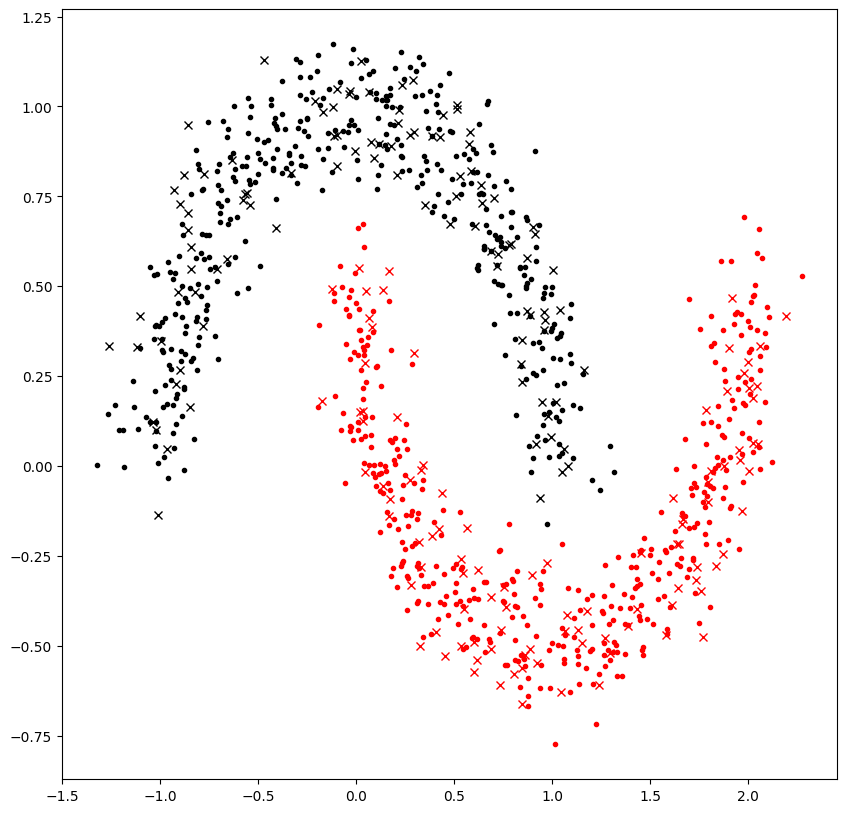

In [21]:
from matplotlib.pyplot import figure
import numpy as np

fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
train_one_indicies = np.argwhere(y_train == 1)
valid_one_indicies=np.argwhere(y_valid == 1)
#points->(x[0], x[1])
ax.plot(x_train[train_one_indicies,0],x_train[train_one_indicies,1],"r.")
ax.plot(x_valid[valid_one_indicies,0],x_valid[valid_one_indicies,1],"rx")

train_zero_indicies=np.argwhere(y_train == 0)
valid_zero_indicies=np.argwhere(y_valid == 0)
ax.plot(x_train[train_zero_indicies,0],x_train[train_zero_indicies,1],"k.")
ax.plot(x_valid[valid_zero_indicies,0],x_valid[valid_zero_indicies,1],"kx")

## Encode targets and move to PyTorch

In [9]:
import torch 
x_train , y_train = torch.tensor(x_train),torch.tensor(y_train)
x_valid , y_valid = torch.tensor(x_valid),torch.tensor(y_valid)

y_train = torch.nn.functional.one_hot(y_train, num_classes = 2) # 1-> [0 1]    # 0-> [1 0]
y_valid = torch.nn.functional.one_hot(y_valid, num_classes = 2)

## Forward path


In [10]:
torch.manual_seed(5)

w = torch.randn(size=[2,2])
w = w.to(torch.float64)
w.requires_grad=True
w.retain_grad()

b = torch.randn(size=[1,2])
b = b.to(torch.float64)
b.requires_grad=True
b.retain_grad()

In [11]:
def predict(x):
  a = x.to(torch.float64) @ w.t() + b
  return torch.softmax(a,dim=1)

## Loss function

In [12]:
def loss_fn(x, y):
    y_hat = predict(x)
    return torch.mean(-(y * torch.log(y_hat)).sum(dim=1))

## Optimization loop

In [13]:
epochs = 1000
delta = 0.1

train_loss, valid_loss = [], []

for epoch in range(epochs): # We loop through the WHOLE dataset in one EPOCH 
    
        current_train_loss = loss_fn(x_train, y_train)
        current_train_loss.backward()
        train_loss.append(current_train_loss.data)

        with torch.no_grad():
            current_valid_loss = loss_fn(x_valid, y_valid)
            valid_loss.append(current_valid_loss.data)
        
            w -= delta * w.grad.data
            b -= delta * b.grad.data
            w.grad.zero_()
            b.grad.zero_()

## Visulization

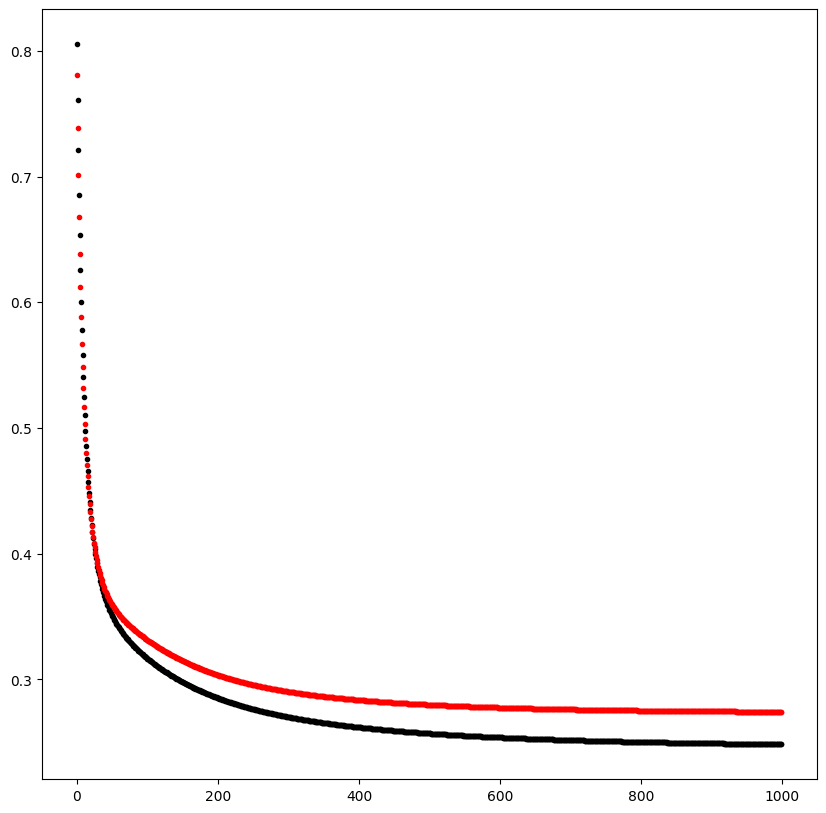

In [14]:
fig = figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.plot(train_loss, "k.")
ax.plot(valid_loss, "r.")

C:\Users\ayaey\AppData\Local\Temp\ipykernel_704\1699740940.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_prediction.show()


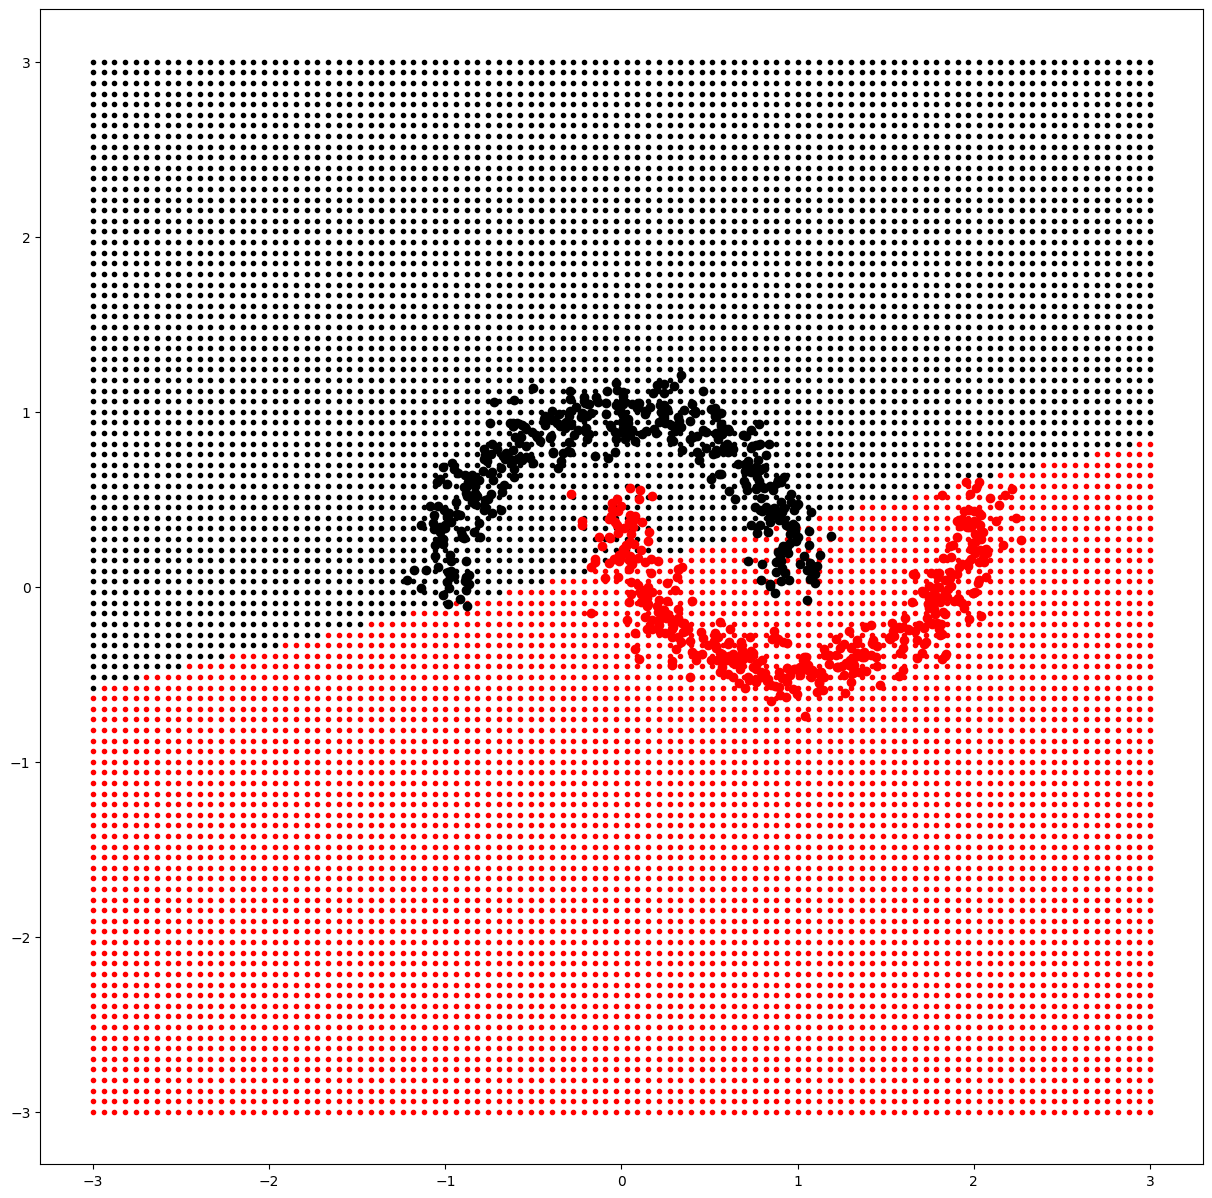

In [15]:
with torch.no_grad():
  x_0 = torch.linspace(-3, 3, 100).repeat(1, 100).t()
  x_1 = torch.linspace(-3, 3, 100).repeat(100, 1).t().reshape(-1, 1)
  x = torch.hstack((x_0, x_1)).to(torch.double)
  x_plt = x.numpy()
  y_hat = predict(x)
  c_hat = torch.argmax(y_hat, dim = 1)
  c_hat_plt = c_hat.numpy()

fig_prediction = figure(figsize = (15, 15))
ax_prediction = fig_prediction.add_subplot(1, 1, 1)
ax_prediction.plot(x_plt[np.argwhere(c_hat_plt == 0), 0], x_plt[np.argwhere(c_hat_plt == 0), 1], "k.")
ax_prediction.plot(x_plt[np.argwhere(c_hat_plt == 1), 0], x_plt[np.argwhere(c_hat_plt == 1), 1], "r.")
ax_prediction.plot(x_train[train_zero_indicies, 0], x_train[train_zero_indicies, 1], "ko")
ax_prediction.plot(x_train[train_one_indicies, 0], x_train[train_one_indicies, 1], "ro")
fig_prediction.show()